# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
import math
sns.set()


In [2]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

* Observing the head of dataframe we can see that there are too many columns of no interest to observation
* We need to select the columns of interest to make our relevant computations and analysis

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data['id'].describe()

count     4870
unique     289
top          b
freq      3364
Name: id, dtype: object

* Generate a list of the columns to pick out the correct columns we need

In [7]:
list(data)

['id',
 'ad',
 'education',
 'ofjobs',
 'yearsexp',
 'honors',
 'volunteer',
 'military',
 'empholes',
 'occupspecific',
 'occupbroad',
 'workinschool',
 'email',
 'computerskills',
 'specialskills',
 'firstname',
 'sex',
 'race',
 'h',
 'l',
 'call',
 'city',
 'kind',
 'adid',
 'fracblack',
 'fracwhite',
 'lmedhhinc',
 'fracdropout',
 'fraccolp',
 'linc',
 'col',
 'expminreq',
 'schoolreq',
 'eoe',
 'parent_sales',
 'parent_emp',
 'branch_sales',
 'branch_emp',
 'fed',
 'fracblack_empzip',
 'fracwhite_empzip',
 'lmedhhinc_empzip',
 'fracdropout_empzip',
 'fraccolp_empzip',
 'linc_empzip',
 'manager',
 'supervisor',
 'secretary',
 'offsupport',
 'salesrep',
 'retailsales',
 'req',
 'expreq',
 'comreq',
 'educreq',
 'compreq',
 'orgreq',
 'manuf',
 'transcom',
 'bankreal',
 'trade',
 'busservice',
 'othservice',
 'missind',
 'ownership']

* Generate table with respect to calls and race

In [8]:
df= data[['race', 'call']]
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


* Separate calls based on value

In [9]:
freq= df.pivot(columns= 'race', values= 'call')
freq.head()

race,b,w
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,0.0,NaN
4,NaN,0.0


* Observing the frequency of values based on race
* Use generated calculations to compare against later

In [10]:
freq.describe()

race,b,w
count,2435.000000,2435.000000
mean,0.064476,0.096509
std,0.245649,0.295346
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


* Use groupby function to observe sive of each race by call 
* We can see that w call back is slightly less than twice that of b

In [11]:
df.groupby(["race", "call"]).size()

race  call
b     0.0     2278
      1.0      157
w     0.0     2200
      1.0      235
dtype: int64

* Making an aesthetically niceer table to see calls by '0' and '1' values based on race

In [12]:
pd.crosstab(df.race, df.call)

call,0.0,1.0
race,,
b,2278,157
w,2200,235


## Generate initial visualizations for preliminary observations

* From histogram it can be observed that there is a significant observable difference between callback values of b and w
* Number of callback for w is greater than that of b

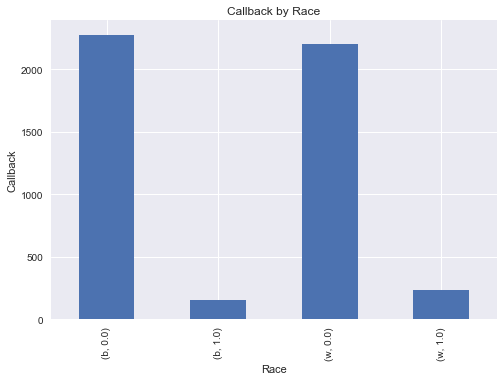

In [55]:
_= df.groupby([df['race'], df['call']]).size().plot(kind='bar')
_= plt.xlabel('Race')
_= plt.ylabel('Callback')
_= plt.title('Callback by Race')
plt.show()

## Identifying the problem 
* Does the proportion of callbacks differ between black and white resumes?
* CLT applies even though the there is a binomial distribution of population the sampling proportions will be normal

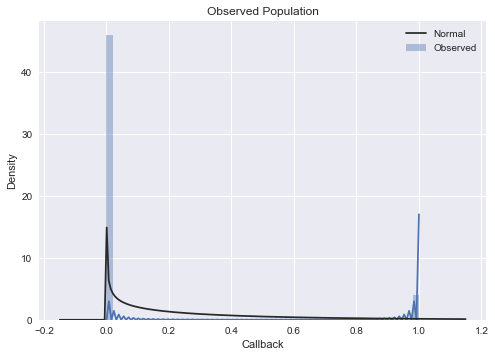

In [144]:
# CLT
_= sns.distplot(df['call'], kde=True, fit=stats.gamma)
_= plt.xlabel('Callback')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

In [138]:
# Assign variable for each race from dataset 
all_b = df[df['race'] == 'b']
all_w = df[df['race'] == 'w']

# Sample size by race
l_b= len(all_b)
l_w= len(all_w)
print(l_b)
print(l_w)

# Samples that received callback
cb_b= all_b.call.sum()
cb_w= all_w.call.sum()

# Ratio of call back 
P_b= cb_b/l_b
P_w= cb_w/l_w


[P_b, P_w]


2435
2435


[0.064476386036960986, 0.096509240246406572]

* since both sample sizes are the same we will only need to use one for further calculations
* from this we can see that approximately 9.7% of white sounding names received callbacks whereas approximately 6.4% of black sounding names received callbacks
* we need to use the 2-sample t-test to determine if the two samples (b and w) are different using the standard 5% threshhold

In [139]:
# Variance
var_b= np.var(all_b)
var_w= np.var(all_w)

# Difference of means

mu_diff= (P_w - P_b)


#Standard deviation
std_b= np.std(all_b)
std_w= np.std(all_w)

# Difference of Standard Deviations of sampling distributions
std_diff= math.sqrt((var_w/l_w)+(var_b/l_b))

# Critical t_value for 95%

t_crit= stats.t.ppf(0.975, l_b-1)
print(t_crit)

# Margin of Error
d= t_crit*std_diff

# 95% confidence interval
CI= [mu_diff-d, mu_diff+d]
CI



1.9609391001


[0.016770261021644545, 0.047295447397246629]

* The confidence interval is such a small interval meaning that the value of probability of the mean with 95% confidence would lie in this parameter
* This suggests that this would be consistent across multiple repititions of this interview process indicating a bias in the process

In [140]:
# Z-Score
z_score= mu_diff/(std_diff)
z_score

4.115583474853989

* The z-score shows that the value is +4 deviations higher than the normal distribution curve 

In [141]:
# P-Value

p= stats.t.sf(z_score, l_b-1)*2
p

3.9905068579683373e-05

* The significantly small p-value shows strong significant evidence against the null hypothesis, thusly allowing the rejection of the null hypothesis

In [127]:
stats.ttest_ind(all_w.call,all_b.call,equal_var=False)

Ttest_indResult(statistic=4.1147052908617514, pvalue=3.9429415136459352e-05)

* t-test finction used to verify z-score and p-value of data

# Conclusion

* Observed p-value is very small so null hypothesis can be rejected and that there is a significant diffrence in callbacks between samples (b and w)
* The 95% confidence interval does not contain a 0 which allows us to conclude that there is a significant diffrence in the means
* Null hypothesis would be that there is no relevance between callbacks by race and the hypothesis would be that there is statistical significance that there is relevance between race and nummber of callbacks
* The number of applicants of each race were the same being 2435, if the samples were different in size it may have changed our observations. Being the same size allowed direct relevance to significance of callback by race to be determined. This means that the frequency can be determined as biased in the hiring process based on instances. 
* It can be proven that the process is biased and requires changes for fairness which would be communicated to ethics of company
* To avoid discrimination cases regarding the interview process the company should make changes to the process 